In [62]:
# Importing Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn

# CRISP-DM : Business Understanding

## Context :

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Who are Pima-indians
According to Wikipedia, the Pima-indian are a group of Native Americans living in an area consisting of what is now central and southern Arizona,
as well as northwestern Mexico in the states of Sonora and Chihuahua. 

## Problem Statement :

Ojective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
based on certain diagnostic measurements included in the dataset.


## Variable Columns :

Pregnancies                   
Glucose                     
BloodPressure                 
SkinThickness                 
Insulin                     
BMI                         
DiabetesPedigreeFunction    
Age 

## Target Column :
                        
Outcome                       





# CRISP-DM : Data Understanding

In [63]:
# Reading dataset
df= pd.read_csv("Diabetes1.csv")

In [64]:
# Displaying First 5 Rows of the Dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,NaN,33.6,0.627,50.0,1
1,1,85.0,66,29,NaN,26.6,0.351,31.0,0
2,8,183.0,64,0,NaN,23.3,0.672,32.0,1
3,1,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40,35,168.0,43.1,2.288,33.0,1


In [65]:
# Displaying Different Types of Variables in the Dataset
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [66]:
# Displaying Simple Statistics of the Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,768.000000,768.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,19.355807,15.952218,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
# Displaying ELmentary Information Regarding the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [68]:
# Finding Number of Null Values in Each Column
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] have value 0.
Logically except Pregnancies, all other features should have some value.



In [69]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,68.184000,19.664000,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,70.824627,22.164179,206.846154,35.406767,0.550500,37.067164


In [70]:
#df.to_csv("Diabetes_clean.csv", index = False)

# CRISP-DM : Data Preperation

## Exploratory Data Analysis 

### General Data Analysis and Visualisation

#### Plotting Target Class Count and Percentage Distributions

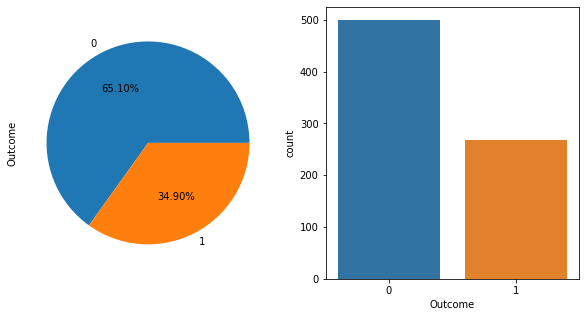

In [71]:
plot.figure(figsize=(10, 5))
plot.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='pie', autopct='%.2f%%')
plot.subplot(1, 2, 2)
sn.countplot(x='Outcome', data=df)
plot.show()


In [72]:
'''
Non-Diabetic Patients are More

'''

'\nNon-Diabetic Patients are More\n\n'

#### Plotting Distributions

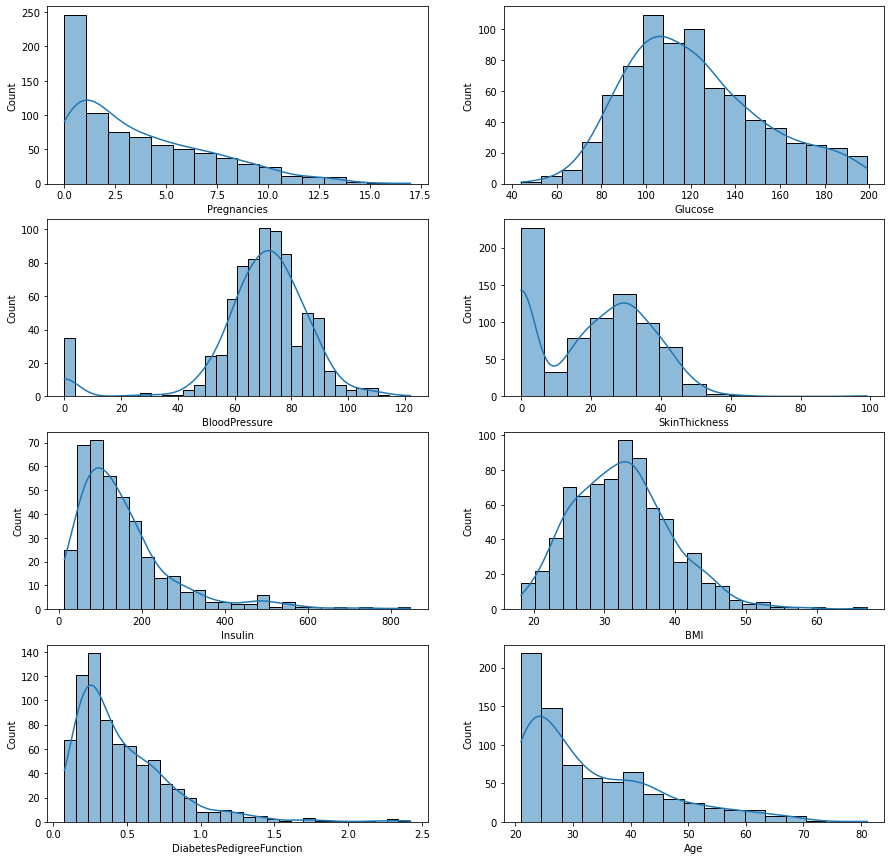

In [73]:
plot.figure(figsize=(15, 15))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plot.subplot(4, 2, i+1)
    sn.histplot(x=col, data=df, kde=True)
plot.show()


In [74]:
'''
Skewness in Distrbutions can be seen, will investigate further.
'''

'\nSkewness in Distrbutions can be seen, will investigate further.\n'

#### Violin Plots to Visualise Further in Variance

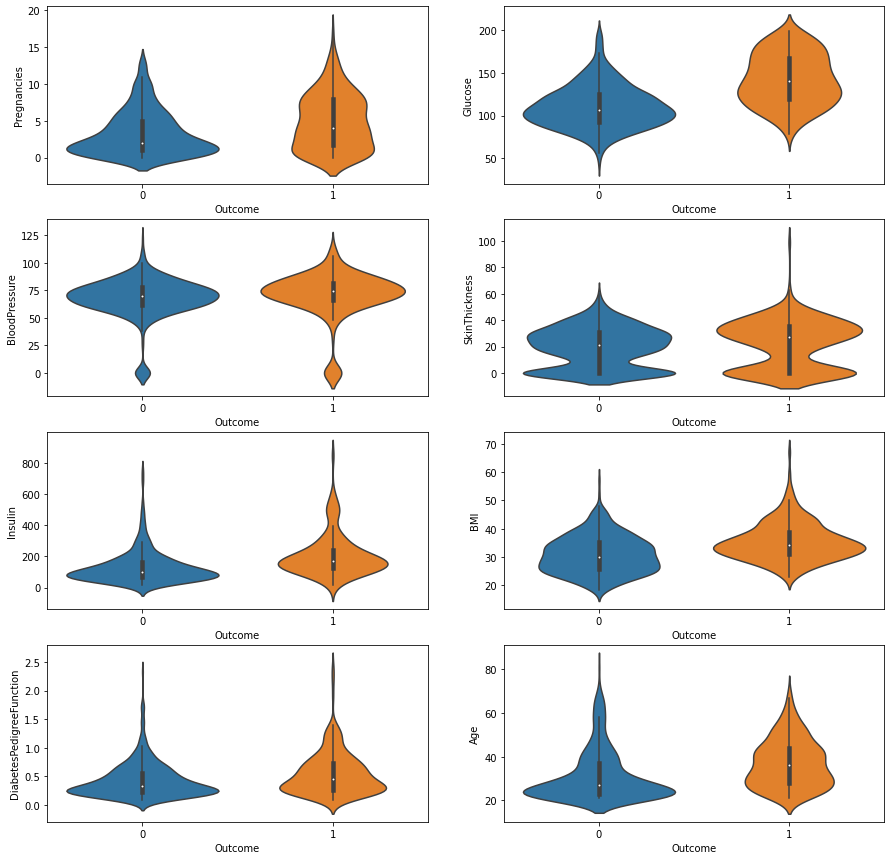

In [75]:
plot.figure(figsize=(15, 15))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plot.subplot(4, 2, i+1)
    sn.violinplot(x='Outcome', y=col, data=df)
plot.show()


### Feature-wise Data Analysis and Pre-Processing

#### Glucoes


##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


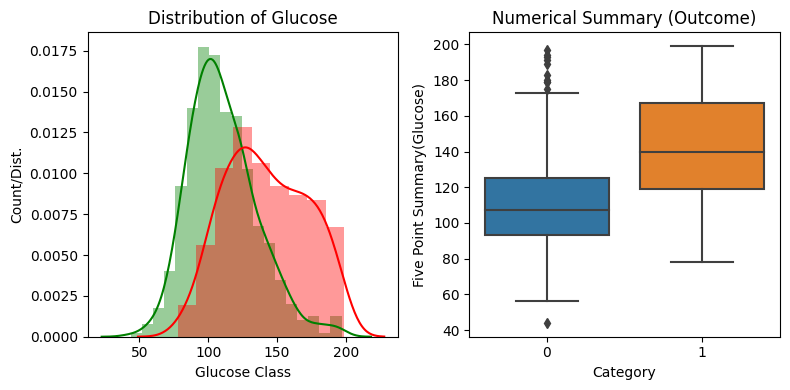

In [76]:
f, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(8, 4))

dist_plot = sn.distplot(df[df['Outcome'] == False]['Glucose'],
                   ax=ax[0], color='green', label='Non Diab.')
sn.distplot(df[df.Outcome == True]['Glucose'],
             ax=ax[0], color='red', label='Diab')
ax[0].set_title('Distribution of Glucose')
ax[0].set_xlabel('Glucose Class')
ax[0].set_ylabel('Count/Dist.')
plot.tight_layout()

five_pt_plot = sn.boxplot(x='Outcome', y='Glucose', data=df, ax=ax[1])
ax[1].set_title(r'Numerical Summary (Outcome)')
ax[1].set_ylabel(r'Five Point Summary(Glucose)')
ax[1].set_xlabel('Category')
plot.tight_layout()

plot.show()




In [77]:
'''

1. Distrubution foloows a bell curve
2. Outliers Present in the lower section
3. Higher Glucoes -> Higher Risk of Diabetes

'''

'\n\n1. Distrubution foloows a bell curve\n2. Outliers Present in the lower section\n3. Higher Glucoes -> Higher Risk of Diabetes\n\n'

#### Skin Thickness

##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


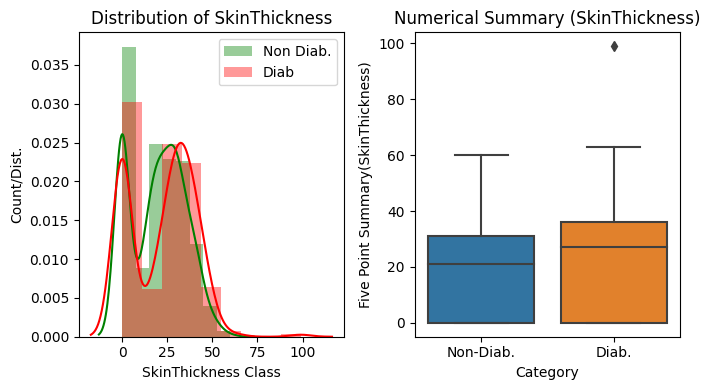

In [78]:
f, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(7, 4))

dist_plot = sn.distplot(df[df['Outcome'] == False]['SkinThickness'],
                   ax=ax[0], color='green', label='Non Diab.')
sn.distplot(df[df.Outcome == True]['SkinThickness'],
             ax=ax[0], color='red', label='Diab')
ax[0].set_title('Distribution of SkinThickness')
ax[0].set_xlabel('SkinThickness Class')
ax[0].set_ylabel('Count/Dist.')
dist_plot.axes.legend(loc=1)
plot.tight_layout()


five_pt_plot = sn.boxplot(x='Outcome', y='SkinThickness', data=df, ax=ax[1])
ax[1].set_title(r'Numerical Summary (SkinThickness)')
ax[1].set_ylabel(r'Five Point Summary(SkinThickness)')
plot.xticks(ticks=[0, 1], labels=['Non-Diab.', 'Diab.'])
ax[1].set_xlabel('Category')
plot.tight_layout()

plot.show()


In [79]:
'''
1. Rough Bell Curve distribution
2. Outliers Present in the lower end

'''

'\n1. Rough Bell Curve distribution\n2. Outliers Present in the lower end\n\n'

#### Pregnancies

##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


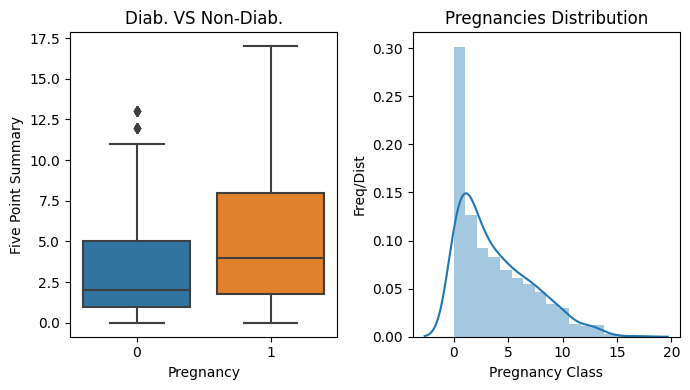

In [80]:
f, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(7, 4))

five_pt_plot = sn.boxplot(x='Outcome', y='Pregnancies', data=df, ax=ax[0])
ax[0].set_title('Diab. VS Non-Diab.')
ax[0].set_xlabel('Pregnancy')
ax[0].set_ylabel('Five Point Summary')
plot.tight_layout()

dist_plot = sn.distplot(df['Pregnancies'], ax=ax[1])
ax[1].set_title('Pregnancies Distribution')
ax[1].set_xlabel('Pregnancy Class')
ax[1].set_ylabel('Freq/Dist')
plot.tight_layout()


plot.show()


In [81]:
'''
1. Distribution is right skewed.
2. Outliers prsent in the upper end.
'''

'\n1. Distribution is right skewed.\n2. Outliers prsent in the upper end.\n'

#### Blood Pressure

##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


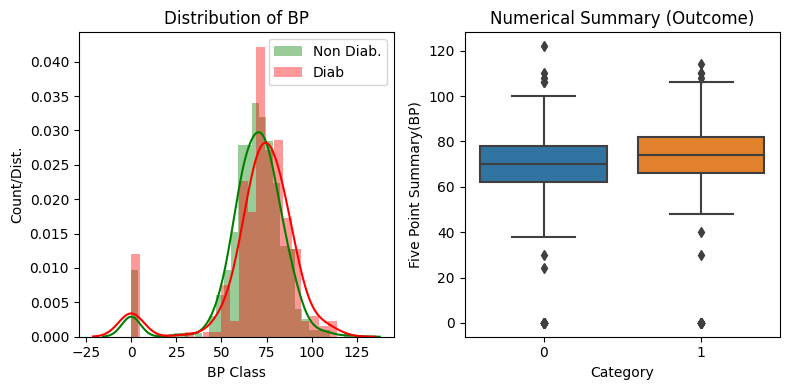

In [82]:
fig, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(8, 4))

dist_plot = sn.distplot(df[df['Outcome'] == False]['BloodPressure'],
                   ax=ax[0], color='green', label='Non Diab.')
sn.distplot(df[df.Outcome == True]['BloodPressure'],
             ax=ax[0], color='red', label='Diab')
ax[0].set_title('Distribution of BP')
ax[0].set_xlabel('BP Class')
ax[0].set_ylabel('Count/Dist.')
dist_plot.axes.legend(loc=1)
plot.tight_layout()

five_pt_plot = sn.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1])
ax[1].set_title(r'Numerical Summary (Outcome)')
ax[1].set_ylabel(r'Five Point Summary(BP)')
ax[1].set_xlabel('Category')
plot.tight_layout()

plot.show()


In [83]:
'''
1. minute skewness.
2. outliers present on the lower end
'''

'\n1. minute skewness.\n2. outliers present on the lower end\n'

#### BMI

##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


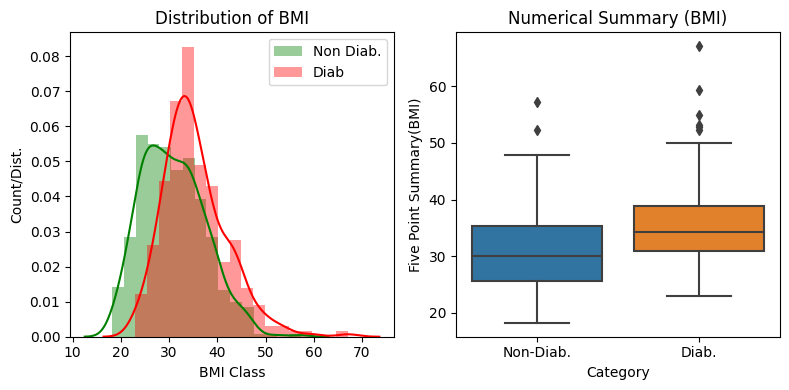

In [84]:
f, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(8, 4))

dist_plot = sn.distplot(df[df['Outcome'] == False]['BMI'],
                   ax=ax[0], color='green', label='Non Diab.')
sn.distplot(df[df.Outcome == True]['BMI'],
             ax=ax[0], color='red', label='Diab')
ax[0].set_title('Distribution of BMI')
ax[0].set_xlabel('BMI Class')
ax[0].set_ylabel('Count/Dist.')
dist_plot.axes.legend(loc=1)
plot.tight_layout()


five_pt_plot = sn.boxplot(x='Outcome', y='BMI', data=df, ax=ax[1])
ax[1].set_title(r'Numerical Summary (BMI)')
ax[1].set_ylabel(r'Five Point Summary(BMI)')
plot.xticks(ticks=[0, 1], labels=['Non-Diab.', 'Diab.'])
ax[1].set_xlabel('Category')
plot.tight_layout()

plot.show()


In [85]:
'''
1. Rough bell curve shape.
2. Outliers present on the upper end
'''

'\n1. Rough bell curve shape.\n2. Outliers present on the upper end\n'

#### Insulin

##### Distribution and Five Point Plot

/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arsalan/.pyenv/versions/3.9.2/envs/idm-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


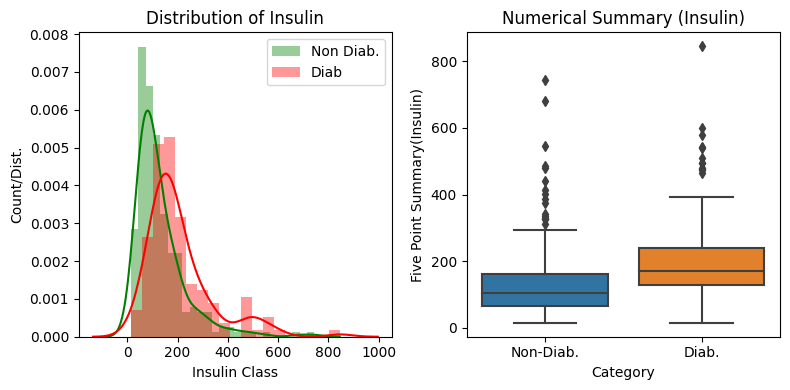

In [86]:
f, ax = plot.subplots(nrows=1, ncols=2, dpi=100, figsize=(8, 4))

dist_plot = sn.distplot(df[df['Outcome'] == False]['Insulin'],
                   ax=ax[0], color='green', label='Non Diab.')
sn.distplot(df[df.Outcome == True]['Insulin'],
             ax=ax[0], color='red', label='Diab')
ax[0].set_title('Distribution of Insulin')
ax[0].set_xlabel('Insulin Class')
ax[0].set_ylabel('Count/Dist.')
dist_plot.axes.legend(loc=1)
plot.tight_layout()


five_pt_plot = sn.boxplot(x='Outcome', y='Insulin', data=df, ax=ax[1])
ax[1].set_title(r'Numerical Summary (Insulin)')
ax[1].set_ylabel(r'Five Point Summary(Insulin)')
plot.xticks(ticks=[0, 1], labels=['Non-Diab.', 'Diab.'])
ax[1].set_xlabel('Category')
plot.tight_layout()

plot.show()


In [87]:
'''
1. Right Skewed disribution
2. outliers present on the upper end
'''

'\n1. Right Skewed disribution\n2. outliers present on the upper end\n'

### Processing out the outliers

#### Multivariate Analysis

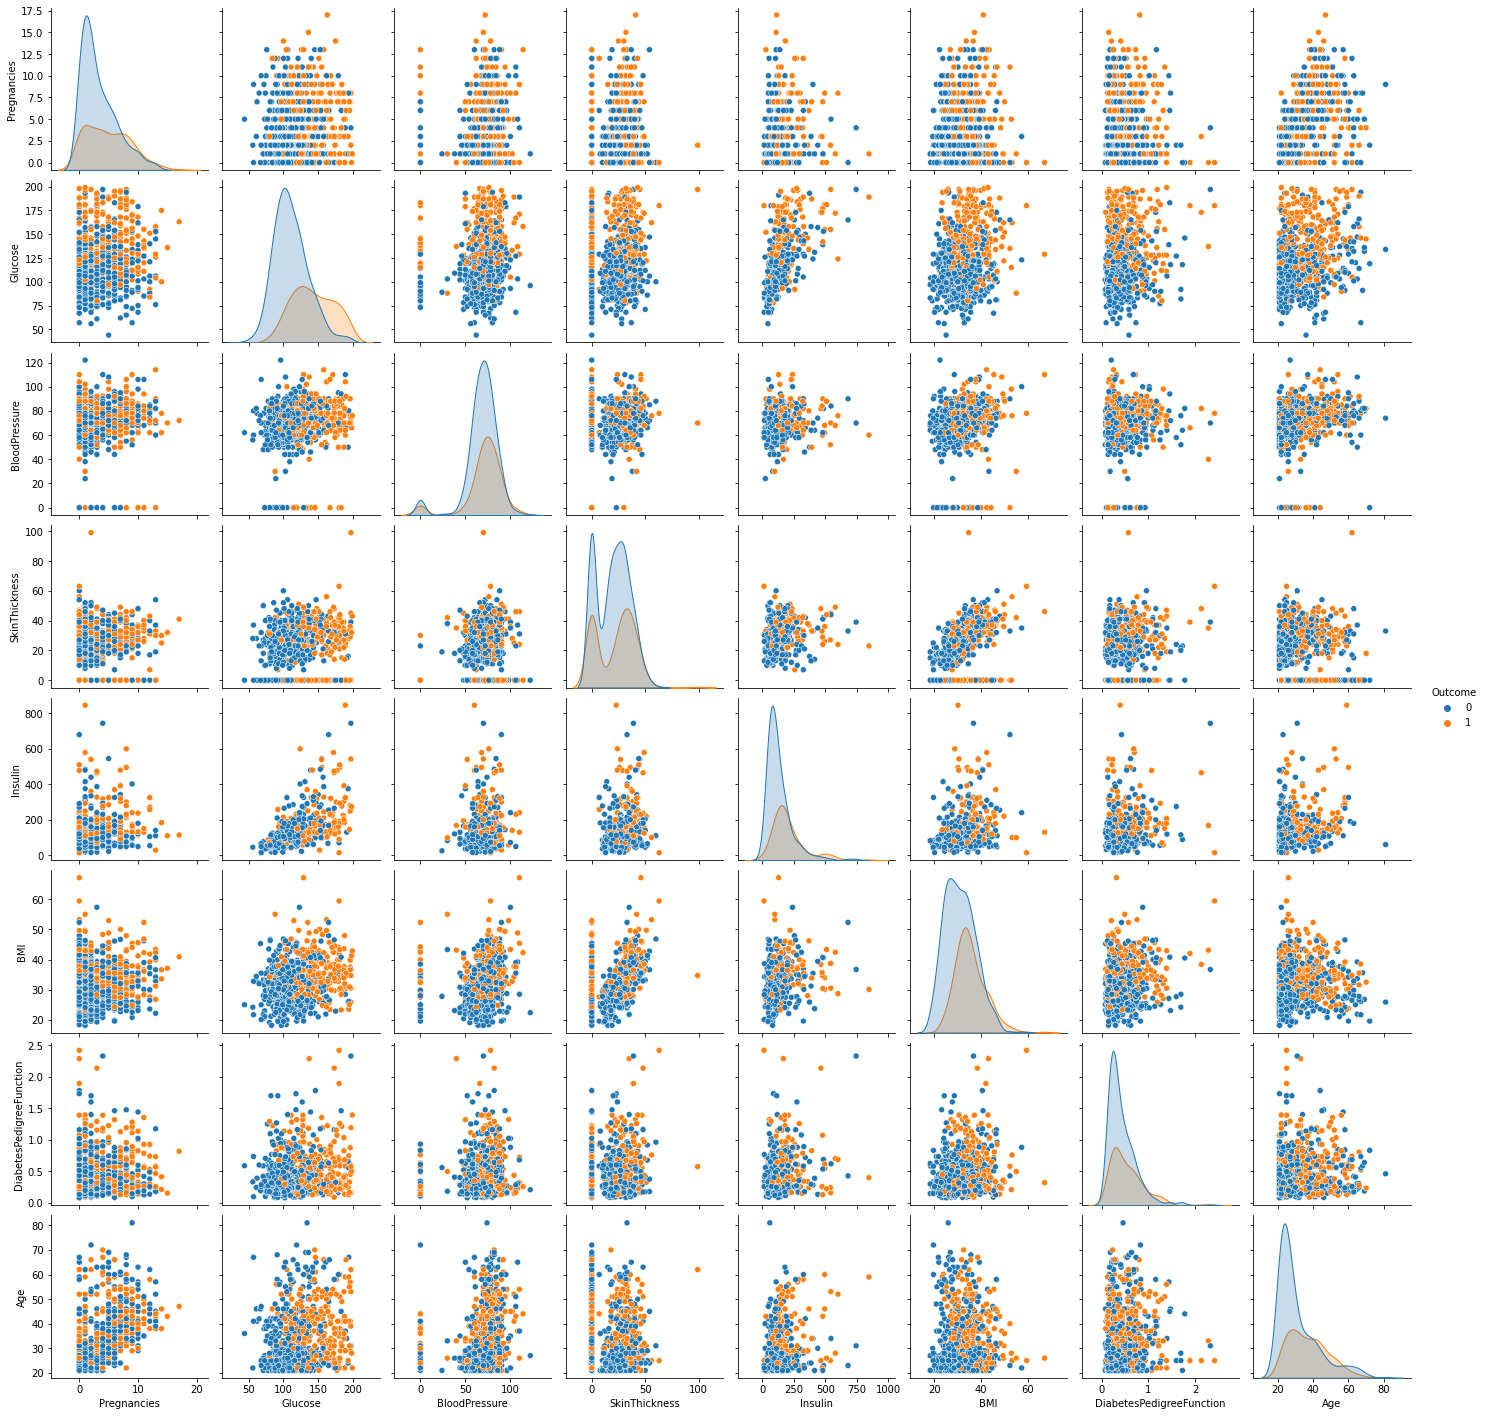

In [88]:
sn.pairplot(df, hue='Outcome', data=df)
plot.show()


In [89]:
'''
Skewness can be seen in the varibales that have outliers

'''

'\nSkewness can be seen in the varibales that have outliers\n\n'

In [90]:
# Removing any row with null value in it
df = df.dropna(how='any', axis=0)
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Statsitical Plots for Outliers

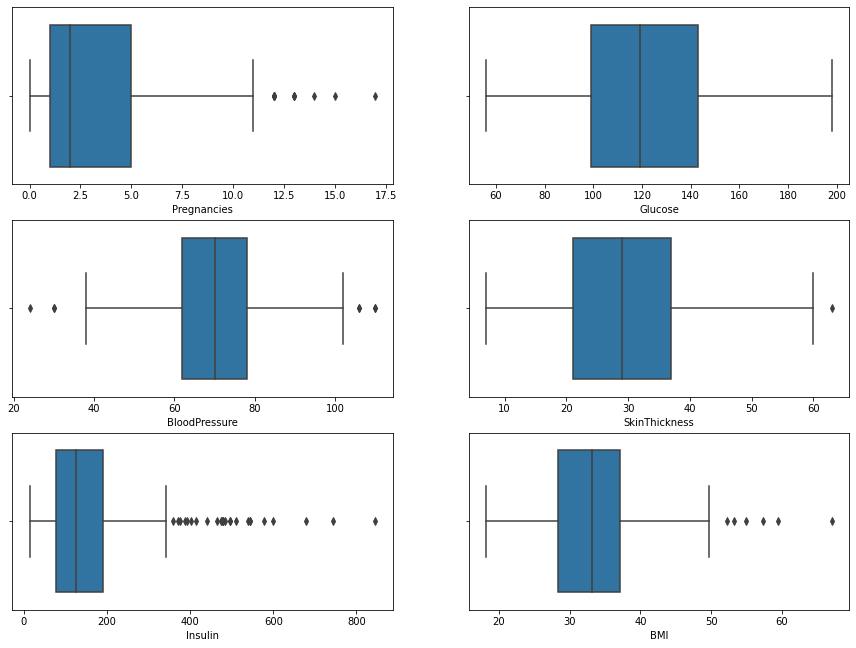

In [91]:
plot.figure(figsize=(15, 15))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    plot.subplot(4, 2, i+1)
    sn.boxplot(x=col, data=df)
plot.show()


### Outlier Removal Using Z-Score

In [92]:
def z_score_removal(df,column) :
    
    # Step 1 : Extreme Values
    high = df[column].mean() + 3*df[column].std()
    low = df[column].mean() - 3*df[column].std()
    
    # Step 2 : Trimming 
    df_trim = df[(df[column] < high) & (df[column] > low)]
    
    
    # Step 3 : Capping
    
    df_trim[column] = np.where(
        df_trim[column] > high,
        high,
        np.where(
            df_trim[column] < low,
            low,
            df_trim[column]
        )
    )
    
    
    
    return df_trim
    
   
    


In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40,35,168.0,43.1,2.288,33.0,1
6,3,78.0,50,32,88.0,31.0,0.248,26.0,1
8,2,197.0,70,45,543.0,30.5,0.158,53.0,1
13,1,189.0,60,23,846.0,30.1,0.398,59.0,1


In [97]:
column_names = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Insulin', 'BloodPressure']

for column in column_names :
    
    df_trim = z_score_removal(df,column)

/var/folders/mq/7cgcdzcn3qj_lhcd7r88h6_00000gn/T/ipykernel_30322/3481221345.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim[column] = np.where(


### Corelation Matrix

<AxesSubplot:>

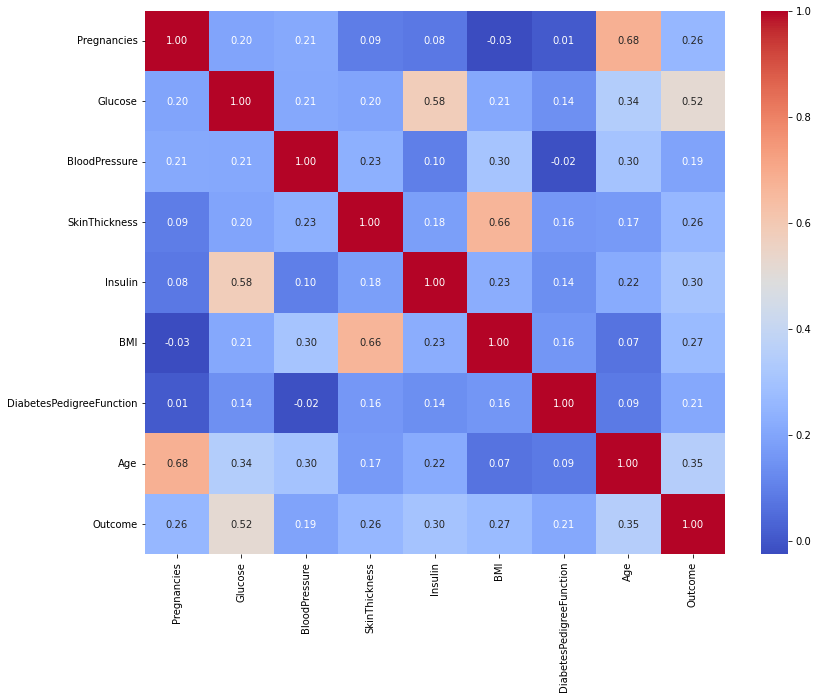

In [98]:
plot.figure(figsize=(13,10))
sn.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [ ]:
'''

Variables Corelated to the Outcome :

1. Pregnancies
2. Glucoes
3. BMI
4. Age

'''